In [1]:
using DynamicalSystems, CairoMakie,  DifferentialEquations, OrdinaryDiffEq

In [2]:
using StaticArrays

In [4]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [12]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;
k1 = -0.17; k2 = -0.17;
el_link = 0.0

condition1 = SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
condition2 = SA[-0.1, -0.1, -0.1, -0.1, -0.1, -0.1]

p = SA[a, b, c, d,
        s, xr, r, I, xv, k1, k2, el_link]


p = [a, b, c, d, s, xr, r, I, xv, k1, k2, el_link]
ds_HR1 = ContinuousDynamicalSystem(HR,  condition1, p )
ds_HR2 = ContinuousDynamicalSystem(HR,  condition2, p );
ds_HR1

6-dimensional continuous dynamical system
 state:       [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, -0.17, -0.17, 0.0]

In [13]:
ds_HR2

6-dimensional continuous dynamical system
 state:       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, -0.17, -0.17, 0.0]

In [16]:
ds = ds_HR1

pvalues = range(0., stop = 0.5, length = 500)
i = 1
plane = (2, 0.0)
tf = 1000.0
tr = 1000.0
p_index = 12

12

In [17]:
output = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr, printparams = true;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

parameter = 0.0
parameter = 0.001002004008016032
parameter = 0.002004008016032064
parameter = 0.003006012024048096
parameter = 0.004008016032064128
parameter = 0.00501002004008016
parameter = 0.006012024048096192
parameter = 0.0070140280561122245
parameter = 0.008016032064128256
parameter = 0.009018036072144289
parameter = 0.01002004008016032
parameter = 0.011022044088176353
parameter = 0.012024048096192385
parameter = 0.013026052104208416
parameter = 0.014028056112224449
parameter = 0.01503006012024048
parameter = 0.01603206412825651
parameter = 0.017034068136272545
parameter = 0.018036072144288578
parameter = 0.01903807615230461
parameter = 0.02004008016032064
parameter = 0.021042084168336674
parameter = 0.022044088176352707
parameter = 0.023046092184368736
parameter = 0.02404809619238477
parameter = 0.025050100200400802
parameter = 0.026052104208416832
parameter = 0.027054108216432865
parameter = 0.028056112224448898
parameter = 0.02905811623246493
parameter = 0.03006012024048096
pa

In [18]:
ds = ds_HR1

pvalues = range(0.0, stop = 0.5, length = 500)
i = 4
plane = (2, 0.0)
tf = 1000.0
tr = 1000.0
p_index = 12

output1 = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr, printparams = true;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

parameter = 0.0
parameter = 0.001002004008016032
parameter = 0.002004008016032064
parameter = 0.003006012024048096
parameter = 0.004008016032064128
parameter = 0.00501002004008016
parameter = 0.006012024048096192
parameter = 0.0070140280561122245
parameter = 0.008016032064128256
parameter = 0.009018036072144289
parameter = 0.01002004008016032
parameter = 0.011022044088176353
parameter = 0.012024048096192385
parameter = 0.013026052104208416
parameter = 0.014028056112224449
parameter = 0.01503006012024048
parameter = 0.01603206412825651
parameter = 0.017034068136272545
parameter = 0.018036072144288578
parameter = 0.01903807615230461
parameter = 0.02004008016032064
parameter = 0.021042084168336674
parameter = 0.022044088176352707
parameter = 0.023046092184368736
parameter = 0.02404809619238477
parameter = 0.025050100200400802
parameter = 0.026052104208416832
parameter = 0.027054108216432865
parameter = 0.028056112224448898
parameter = 0.02905811623246493
parameter = 0.03006012024048096
pa

In [19]:
output_summ = output + output1;

In [20]:
CairoMakie.activate!()

In [ ]:
ticks = range(-0.5, 0.5, length = 6)

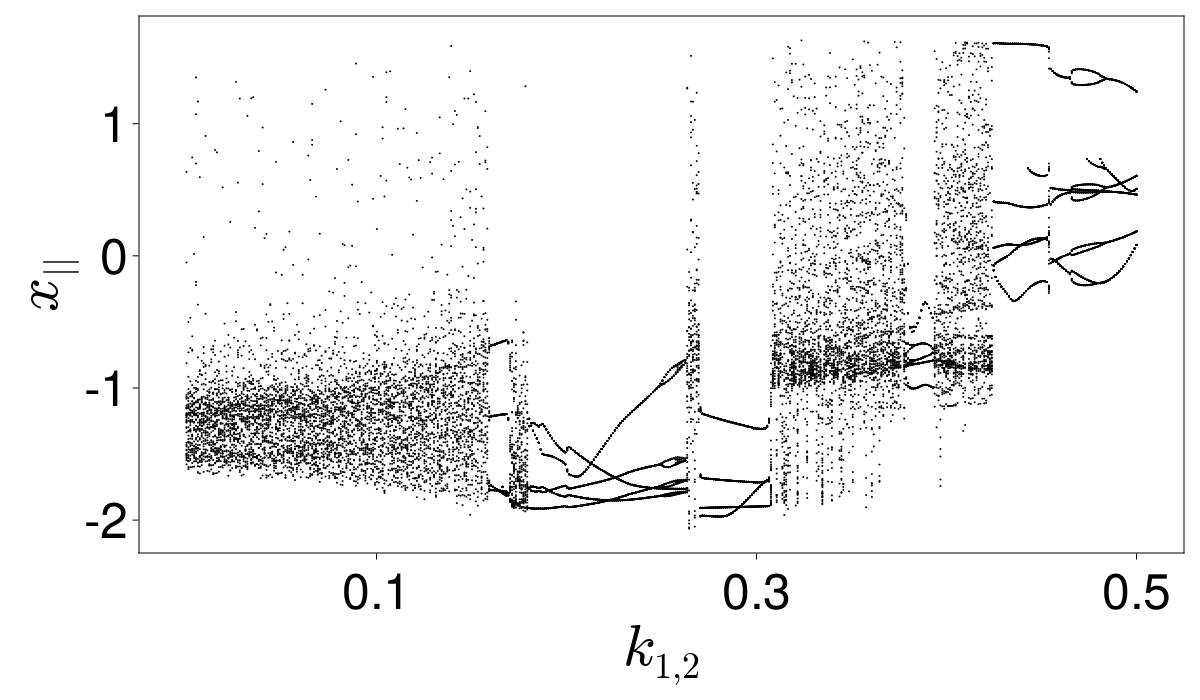

In [22]:
fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false

for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 1.0), markersize = 2.0
    )
    
end
fig